<a href="https://colab.research.google.com/github/SANDRAJACOB1/CognoRise-Infotech/blob/main/CognoRise_Sentiment_Analysis_on_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To read file from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATAFRAME**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv',encoding="ISO-8859-1")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**DATA PREPROCESSING**

In [ ]:
#Printing the first five rows of the dataframe

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Printing the last five rows of the dataframe

df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
#Printing the shape of the dataframe

df.shape

(50000, 2)

In [ ]:
#Printing the column names of the dataframe

df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
#Printing summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Describing the dataframe

df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#Printing the dataype of each column of the dataframe

df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
#Checking for missing values in each column of the dataframe

df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
#Printing count of unique values in the column sentiment

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**DATA VISUALISATION**

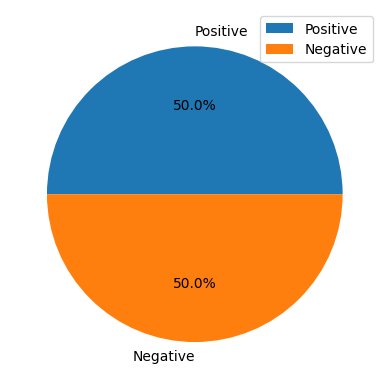

In [ ]:
x=df['sentiment'].value_counts()
values=['Positive','Negative']
plt.pie(x,labels=values,autopct='%1.1f%%')
plt.legend()

In [ ]:
#Converting the object datatype into numerical in the output column

df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df.dtypes

review       object
sentiment     int64
dtype: object

**DOWNLOADING NLTK RESOURCES**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Assigning the datas in the column Message to a variable

tweets=df.review
tweets

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Tokenization

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))
tweets

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . < br / > < br ...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Removing special characters and symbols

import re
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0        One of the other reviewers has mentioned that ...
1        A wonderful little production     br       br ...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s   Love in the Time of Money   ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot   bad dialogue   bad acting   idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Collecting meaningful words by filtering short words

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tweets=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweets

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review, Length: 50000, dtype: object

In [ ]:
#Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0        one the other review has mention that after wa...
1        wonder littl product the film techniqu veri un...
2        thought this was wonder way spend time too hot...
3        basic there famili where littl boy jake think ...
4        petter mattei love the time money visual stun ...
                               ...                        
49995    thought this movi did down right good job wasn...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    cathol taught parochi elementari school nun ta...
49998    go have disagre with the previous comment and ...
49999    one expect the star trek movi high art but the...
Name: review, Length: 50000, dtype: object

In [ ]:
#Removing stopwords

from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0        one review mention watch episod hook right exa...
1        wonder littl product film techniqu veri unassu...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previous comment side maltin one se...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [ ]:
#Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<50000x69191 sparse matrix of type '<class 'numpy.float64'>'
	with 4699756 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 55282)	0.05645442151148504
  (0, 15392)	0.09255333242675393
  (0, 61958)	0.05836791752017903
  (0, 65589)	0.05112020296418031
  (0, 63590)	0.08744807304476805
  (0, 13072)	0.0803726697741851
  (0, 6298)	0.04694823771462925
  (0, 38273)	0.04613047762053748
  (0, 20654)	0.05573779159463934
  (0, 55745)	0.07057984855751959
  (0, 58352)	0.06445945493294555
  (0, 34178)	0.053491707153635784
  (0, 7321)	0.09592305010733011
  (0, 62931)	0.043633528433661195
  (0, 12397)	0.06307450431177138
  (0, 39486)	0.0620396793154779
  (0, 37561)	0.06996716942356038
  (0, 66717)	0.031231910345191568
  (0, 24361)	0.057783680097277024
  (0, 44100)	0.059519470126406106
  (0, 33077)	0.046874743157844234
  (0, 30231)	0.2045632150226608
  (0, 42456)	0.12711305370104575
  (0, 56558)	0.08735090339316745
  (0, 26017)	0.0813230640974881
  :	:
  (49999, 67863)	0.09376171274563663
  (49999, 57691)	0.0834539569554125
  (49999, 26908)	0.08745038615330068
  (49999, 42068)	0.08783078318167915
  (49999, 25197)	0.053

**SEPERATING INPUT AND OUTPUT FEATURES**

In [ ]:
y=df['sentiment'].values
y

array([1, 1, 1, ..., 0, 0, 0])

**SPLITTING THE DATA IN TO TRAINING AND TESTING DATAS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=0)
x_train

<35000x69191 sparse matrix of type '<class 'numpy.float64'>'
	with 3281874 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<15000x69191 sparse matrix of type '<class 'numpy.float64'>'
	with 1417882 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

**MODEL CREATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=7)
multi=MultinomialNB()
tree=DecisionTreeClassifier(criterion='entropy')
forest=RandomForestClassifier(n_estimators=100,random_state=0)
linear=LogisticRegression()
lst=[knn,multi,tree,forest,linear]

**PERFORMANCE EVALUATION**

In [ ]:
for i in lst:
  print("Model Started")
  print(i)
  print("*"*50)
  i.fit(x_train,y_train)
  print("The Predicted values are")
  y_pred=i.predict(x_test)
  print(y_pred)
  print("Testing values are")
  print(y_test)
  print("Confusion matrics is")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score is")
  print(accuracy_score(y_test,y_pred))
  print("Performance Evaluations is")
  print(classification_report(y_test,y_pred))
  print("*"*50)

Model Started
KNeighborsClassifier(n_neighbors=7)
**************************************************
The Predicted values are
[1 0 1 ... 1 0 0]
Testing values are
[1 0 0 ... 1 1 0]
Confusion matrics is
[[5418 2122]
 [1121 6339]]
Accuracy score is
0.7838
Performance Evaluations is
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      7540
           1       0.75      0.85      0.80      7460

    accuracy                           0.78     15000
   macro avg       0.79      0.78      0.78     15000
weighted avg       0.79      0.78      0.78     15000

**************************************************
Model Started
MultinomialNB()
**************************************************
The Predicted values are
[1 0 1 ... 1 0 0]
Testing values are
[1 0 0 ... 1 1 0]
Confusion matrics is
[[6555  985]
 [1110 6350]]
Accuracy score is
0.8603333333333333
Performance Evaluations is
              precision    recall  f1-score   support

           0 